# Student Performansi Axem

In [1]:
#Import Libraries
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)


%matplotlib inline

In [108]:
# Load Data and check the head of your data

df1 = pd.read_csv('StudentsPerformance.csv', encoding = 'ISO-8859-1')
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [113]:
for i in df1['parental level of education']:
    if i == 'some 3':
        print(i)

In [117]:
#Look for the information about your data
df.describe()

,PaLeEd,math_score,reading_score,writing_score,PaLeEd_associate's degree,PaLeEd_bachelor's degree,PaLeEd_high school,PaLeEd_master's degree,PaLeEd_some college,PaLeEd_some high school
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.307000,66.08900,69.169000,68.054000,0.222000,0.11800,0.196000,0.059000,0.226000,0.179000
std,1.610386,15.16308,14.600192,15.195657,0.415799,0.32277,0.397167,0.235743,0.418448,0.383544
min,1.000000,0.00000,17.000000,10.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,57.00000,59.000000,57.750000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,66.00000,70.000000,69.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,77.00000,79.000000,79.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,5.000000,100.00000,100.000000,100.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [72]:
df.columns=df.columns.str.replace('parental_level_of_education', 'PaLeEd')

In [77]:
df.head()

,gender,race/ethnicity,PaLeEd,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
sum(df.n_people)

21003

In [33]:
def countplot(column_name):
    df_sorted = df.sort_values(column_name, ascending=False)
    plt.figure(figsize=(25,6))
    sns.countplot(column_name,data=df_sorted)
    df_sorted
   

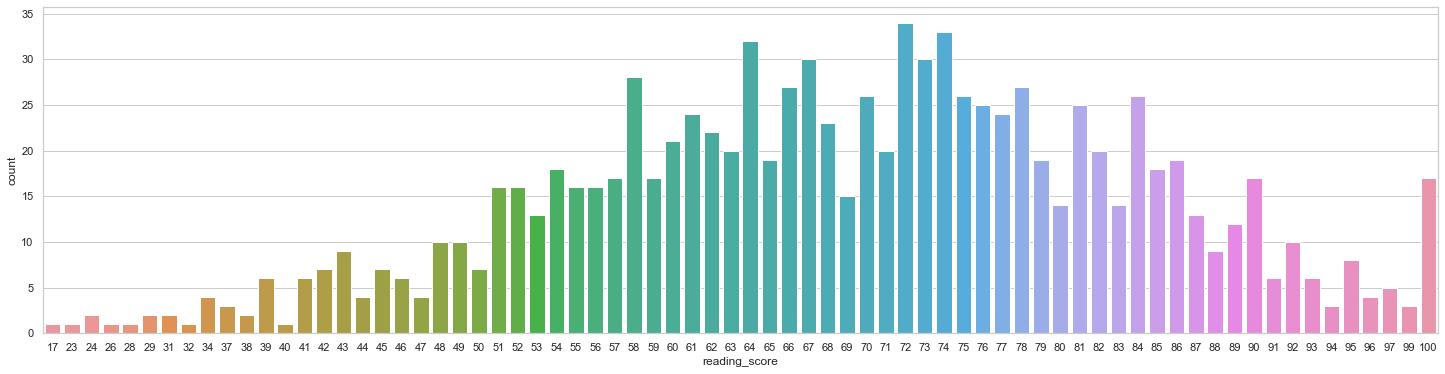

In [34]:
countplot('reading_score')


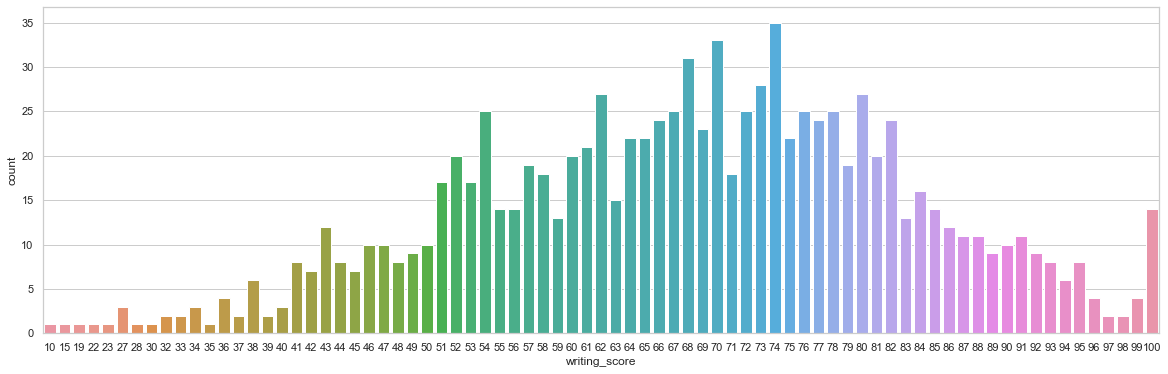

In [31]:
countplot('writing_score')

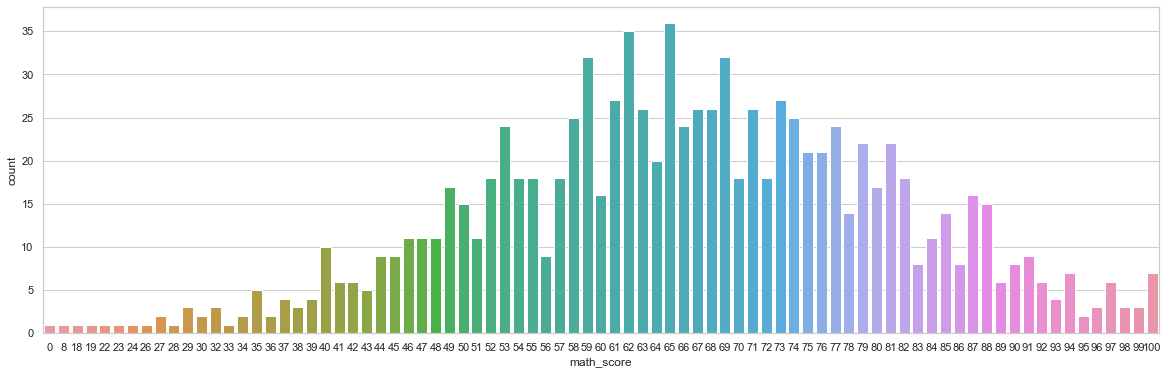

In [32]:
countplot('math_score')

In [60]:
def hist_gender(column):
    female = df[df['gender'] == 'female']

    male = df[df['gender'] == 'male']
    plt.figure(figsize=(20,7))
    #female["math_score"].plot.hist(alpha=0.5, color='red', bins=50)
    female[column].plot.hist(alpha=0.5, color='pink', bins=100)
    #male["math_score"].plot.hist(alpha=0.5, color='blue', bins=50)
    male[column].plot.hist(alpha=0.5, color='blue', bins=100)
    plt.legend(["female", "male"])
    plt.show()

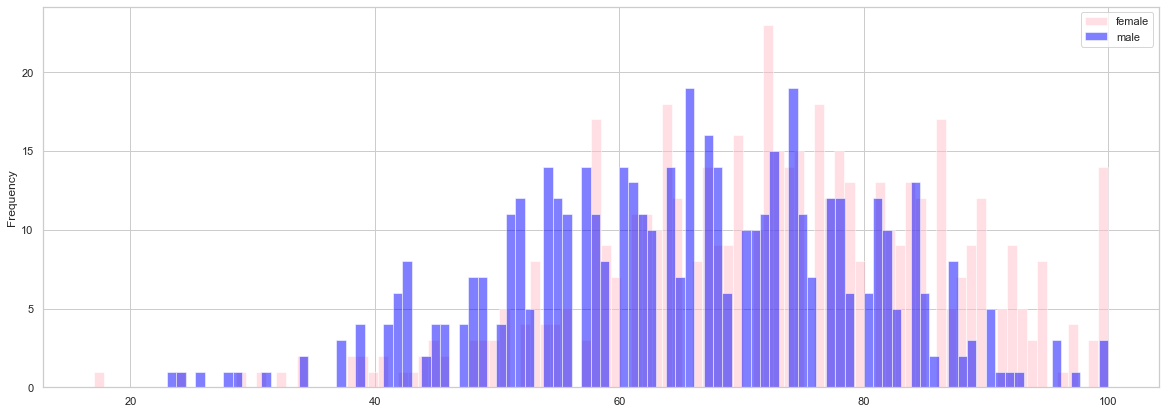

In [61]:
hist_gender('reading_score')

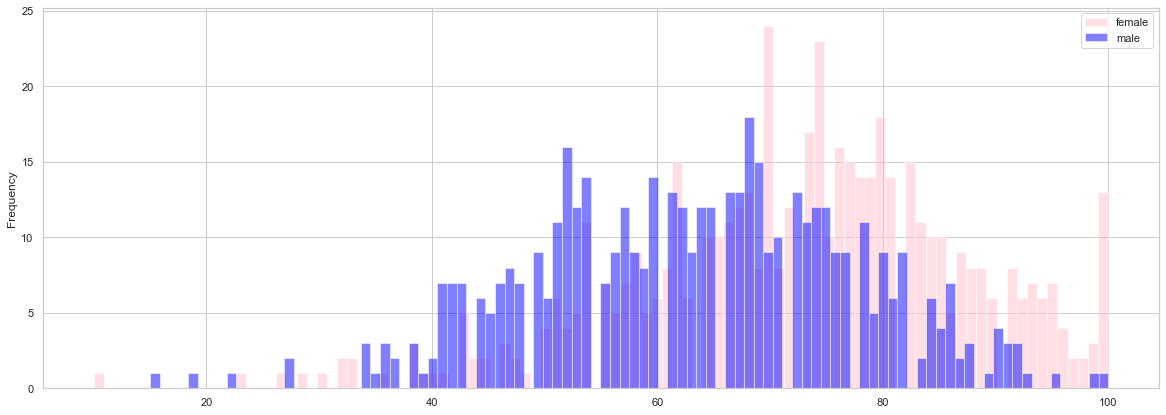

In [62]:
hist_gender('writing_score')

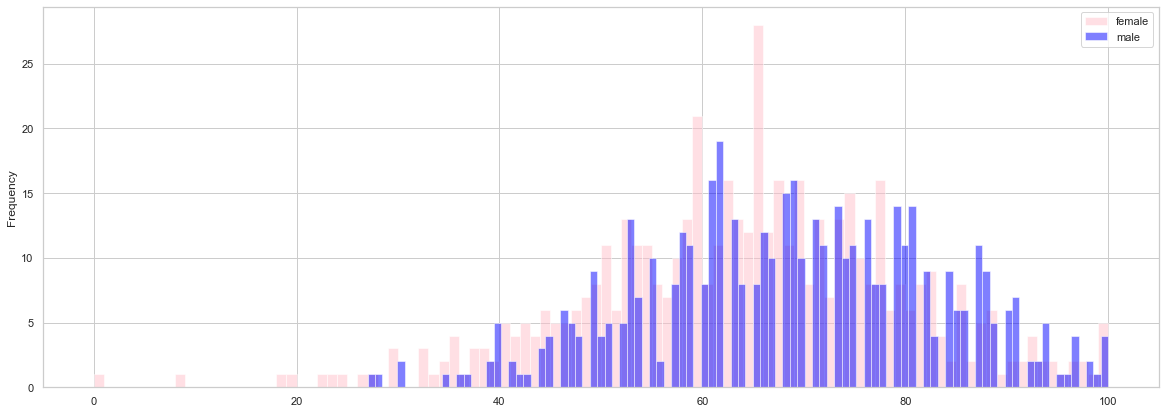

In [63]:
hist_gender('math_score')

In [66]:


def hist_ethnicity(column):
    groupA = df[df['race/ethnicity'] == 'group A']

    groupB = df[df['race/ethnicity'] == 'group B']
    groupC = df[df['race/ethnicity'] == 'group C']
    
    
    plt.figure(figsize=(20,7))
    #female["math_score"].plot.hist(alpha=0.5, color='red', bins=50)
    groupA[column].plot.hist(alpha=0.5, color='pink', bins=100)
    #male["math_score"].plot.hist(alpha=0.5, color='blue', bins=50)
    groupB[column].plot.hist(alpha=0.5, color='blue', bins=100)
    groupC[column].plot.hist(alpha=0.5, color='yellow', bins=100)
    plt.legend(["groupA", "groupB", 'groupC'])
    plt.show()

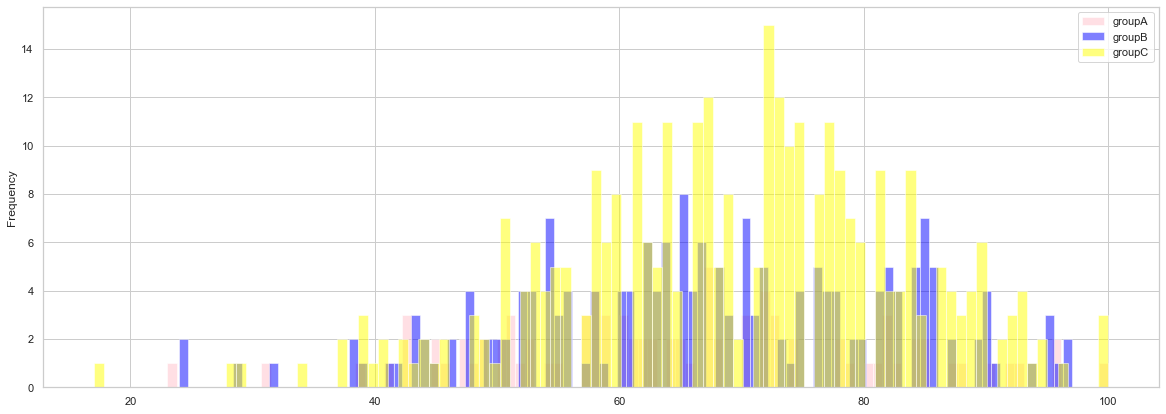

In [68]:
hist_ethnicity('reading_score')

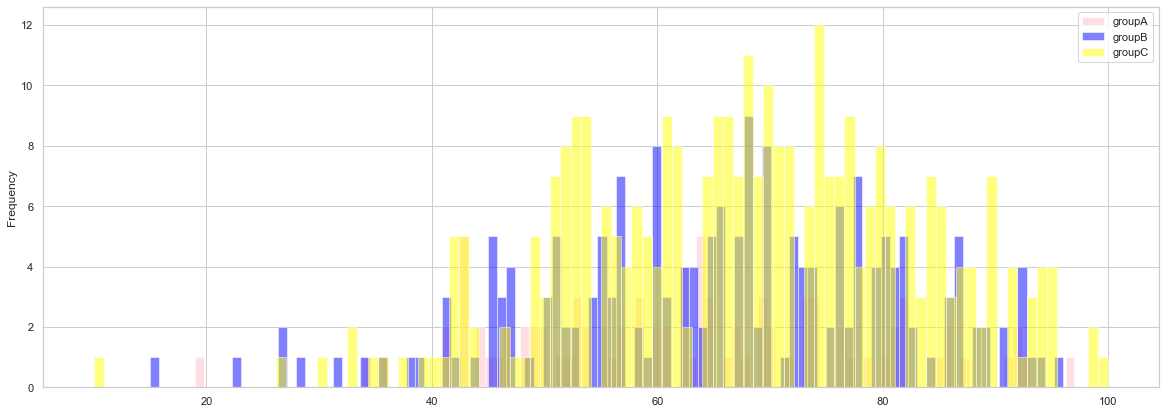

In [70]:
hist_ethnicity('writing_score')

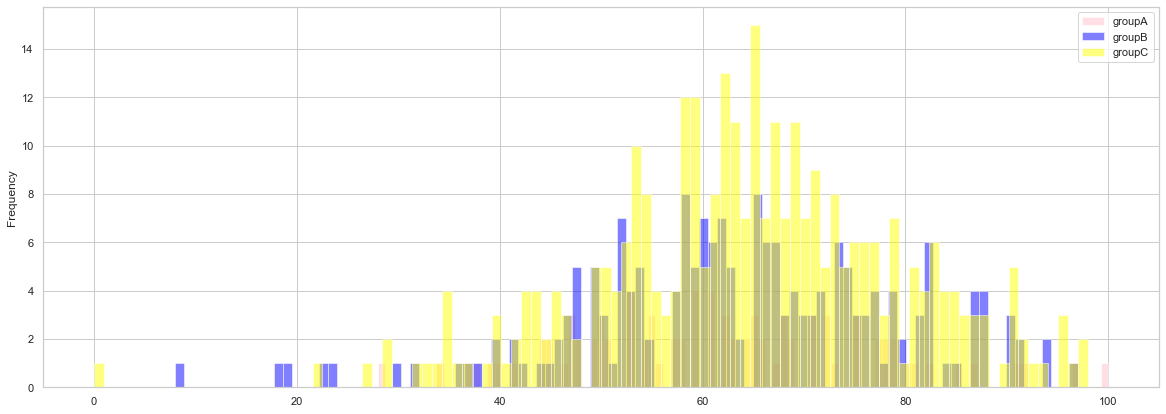

In [71]:
hist_ethnicity('math_score')

In [75]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df, dummies], axis=1)
    return df

In [79]:
df = create_dummies(df, "PaLeEd")

In [100]:
df.head()

,gender,race/ethnicity,PaLeEd,lunch,test_preparation_course,math_score,reading_score,writing_score,PaLeEd_associate's degree,PaLeEd_bachelor's degree,PaLeEd_high school,PaLeEd_master's degree,PaLeEd_some college,PaLeEd_some high school
0,female,group B,2,standard,none,72,72,74,0,1,0,0,0,0
1,female,group C,5,standard,completed,69,90,88,0,0,0,0,1,0
2,female,group B,4,standard,none,90,95,93,0,0,0,1,0,0
3,male,group A,1,free/reduced,none,47,57,44,1,0,0,0,0,0
4,male,group C,5,standard,none,76,78,75,0,0,0,0,1,0


In [114]:
df.PaLeEd=df.PaLeEd.str.replace('some 3', '5')

In [99]:
#associate's degree : 1
#  bachelor's degree : 2
# high school : 3
#'master's degree : 4
# some college : 5
# some high school : 6

df.PaLeEd=df.PaLeEd.str.replace('some high school', '6') 


In [115]:
for i in df['PaLeEd']:
    print(i)

2
5
4
1
5
1
5
5
3
3
1
1
3
5
4
5
3
5
4
1
3
5
5
5
2
4
5
2
3
4
5
5
4
5
5
1
1
5
1
1
1
1
1
5
1
1
1
3
1
3
5
1
5
3
5
3
1
1
5
5
2
5
1
1
5
5
5
5
1
1
5
5
1
5
5
1
5
2
5
4
1
3
5
1
3
5
5
1
5
5
2
3
3
1
5
1
5
5
5
2
5
2
1
3
5
5
4
1
1
5
1
3
1
5
2
3
2
2
5
5
2
1
5
3
5
3
5
5
4
2
4
5
5
5
2
2
5
3
1
5
5
5
5
3
5
5
5
1
2
1
5
2
1
2
5
5
3
5
1
1
1
5
4
3
4
2
3
4
3
5
3
5
5
1
2
4
3
1
4
5
4
5
3
1
5
1
3
5
5
2
1
5
5
5
4
1
5
3
5
2
1
5
1
1
5
5
2
3
5
5
5
5
3
1
3
5
1
3
3
5
3
1
5
5
1
4
5
3
5
5
5
1
2
5
2
1
2
5
5
1
3
2
3
5
5
1
1
3
3
3
5
5
5
4
3
5
1
1
5
4
5
5
5
3
3
5
2
3
1
5
2
5
1
5
5
2
5
3
5
2
3
3
2
5
5
1
1
5
2
5
1
5
5
2
3
1
5
1
3
1
5
5
1
1
1
5
5
5
1
3
1
2
2
1
2
3
4
1
2
1
3
3
5
5
3
5
5
5
1
5
3
1
1
1
2
5
5
1
5
5
3
3
3
1
5
3
5
2
3
1
2
5
5
1
5
2
1
5
5
5
3
5
5
5
5
2
3
2
5
5
5
5
5
5
2
1
5
4
5
2
1
1
4
5
5
5
2
1
3
4
5
5
5
1
5
3
3
1
5
5
5
5
5
3
3
5
1
1
3
1
4
5
1
5
2
3
2
1
5
3
1
3
4
5
5
5
2
5
5
5
1
3
3
5
5
5
1
1
3
5
5
3
5
1
5
5
5
3
3
1
5
5
1
5
1
2
2
1
2
3
2
5
5
5
2
5
1
3
3
5
1
3
1
5
1
2
2
1
4
1
3
1
5
3
1
3
5
1
5
1
1
1
5
2
3
3
5
5
5
5


In [116]:
df["PaLeEd"] = df["PaLeEd"].astype(int)

In [7]:
# check missing values in train dataset
df.isnull().sum()

family_id    0
choice_0     0
choice_1     0
choice_2     0
choice_3     0
choice_4     0
choice_5     0
choice_6     0
choice_7     0
choice_8     0
choice_9     0
n_people     0
dtype: int64

In [7]:
#Your date/time column is a plain text format, convert whole column to timestamps
df["ship_date"] = df["ship_date"].map(pd.to_datetime)
df.order_date = df.order_date.map(pd.to_datetime)

In [32]:
train = pd.get_dummies(df, columns=["sales_channel"])

In [33]:
train = pd.get_dummies(df, columns=["order_priority"])

In [30]:
train.drop('sales_channel', axis=1, inplace=True)
#train.drop('order_priority', axis=1, inplace=True)


In [35]:
train.head(5)
df=train

In [36]:
df[(df["item_type"]=='Vegetables')].median(skipna=True)

order_id            8.019441e+08
unit_sold           2.608500e+03
unit_price          1.540600e+02
unit_cost           9.093000e+01
total_revenue       4.018655e+05
total_cost          2.371909e+05
total_profit        1.646746e+05
order_priority_C    0.000000e+00
order_priority_H    5.000000e-01
order_priority_L    0.000000e+00
order_priority_M    0.000000e+00
dtype: float64

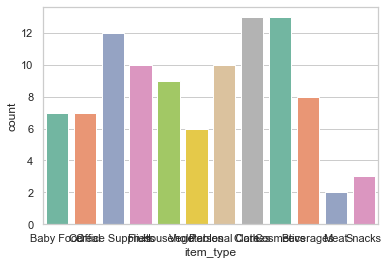

In [37]:

sns.countplot(x='item_type',data=df,palette='Set2')
plt.show()


In [7]:
#Create a function to get week day and map it to Date/Time column to create new WeekDay Column.
def get_weekday(df):
    return df.weekday()
df["Weekday"] = df["Date/Time"].map(get_weekday)

In [8]:
#Create a function to get hour and map it to Date/Time column to create new hour Column.

def get_hours(df):
    return df.hour

df["Hour"] = df["Date/Time"].map(get_hours)

In [51]:

df[df.item_type == 'Baby Food']


,Region,Country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,unit_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2015-02-04,547995746,2015-02-21,2974,255.28,159.42,759202.72,474115.08,285087.64
20,Europe,Norway,Baby Food,Online,L,2014-05-14,819028031,2014-06-28,7450,255.28,159.42,1901836.00,1187679.00,714157.00
21,Europe,Portugal,Baby Food,Online,H,2015-07-31,860673511,2015-09-03,1273,255.28,159.42,324971.44,202941.66,122029.78
61,Europe,San Marino,Baby Food,Online,L,2013-06-26,569662845,2013-07-01,4750,255.28,159.42,1212580.00,757245.00,455335.00
78,Europe,Monaco,Baby Food,Offline,H,2012-05-29,688288152,2012-06-02,8614,255.28,159.42,2198981.92,1373243.88,825738.04
87,Sub-Saharan Africa,The Gambia,Baby Food,Offline,M,2014-02-03,494747245,2014-03-20,5559,255.28,159.42,1419101.52,886215.78,532885.74


# Analysis

(array([14., 12., 10.,  9.,  6., 10., 13., 13.,  8.,  5.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

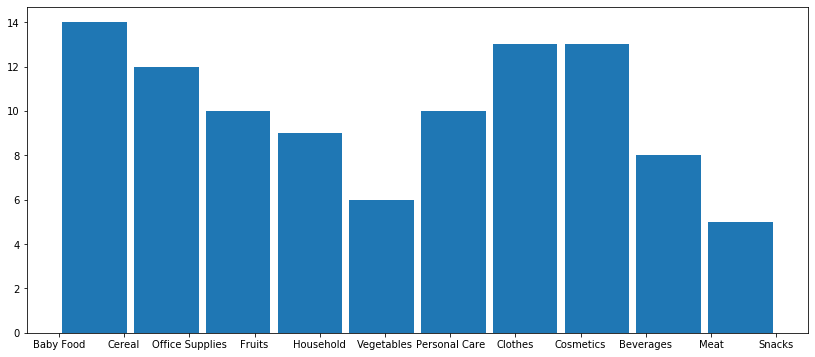

In [45]:
# Plot your day of Month column by using matplotlib histogram
plt.figure(figsize=(14,6))
plt.hist(df['item_type'], rwidth=0.9)
# Set the labels and titles

In [37]:
# Define a function that counts the rows by Day of the month
def count_rows(rows):
    return len(rows)

# Group  the counts of rows by day
by_day = df.groupby('item_type').apply(count_rows)
by_day

# Hint: 
# for k, rows in df.groupby("DayOfMonth"):
#    print(k,len(rows))

item_type
Baby Food           7
Beverages           8
Cereal              7
Clothes            13
Cosmetics          13
Fruits             10
Household           9
Meat                2
Office Supplies    12
Personal Care      10
Snacks              3
Vegetables          6
dtype: int64

In [39]:
for k, rows in df.groupby("total_profit"):
    print(k,len(rows))

1258.02 1
1621.93 1
5270.67 1
6841.38 1
7828.12 1
9119.44 1
10795.23 1
13009.18 1
14031.02 1
15103.47 1
18405.17 1
19525.82 1
23150.46 1
46735.86 1
53252.5 1
60418.38 1
65214.72 1
72975.6 1
75555.9 1
80241.84 1
85033.8 1
85223.58 1
89904.06 1
93748.05 1
119685.0 1
122029.78 1
122686.5 1
122819.06 1
122865.12 1
127054.2 1
127722.96 1
138262.14 1
144521.02 1
146875.14 1
147031.74 1
152114.2 1
159832.5 1
160609.54 1
160935.32 1
166635.36 1
187545.03 1
216919.36 1
224598.75 1
225246.9 1
235601.16 1
248406.36 1
255151.25 1
255718.08 1
272672.4 1
285087.64 1
296448.35 1
306097.92 1
315574.05 1
337937.6 1
359941.17 1
369155.0 1
392780.1 1
403773.12 1
404010.78 1
407630.41 1
435499.2 1
436446.25 1
449159.04 1
455335.0 1
495007.89 1
503358.75 1
510216.66 1
532885.74 1
539196.48 1
575916.48 1
579000.96 1
584073.87 1
606834.72 1
632512.5 1
634745.9 1
639077.5 1
693911.51 1
696647.5 1
714157.0 1
727423.2 1
747939.49 1
766835.04 1
778415.99 1
825738.04 1
846885.0 1
889472.91 1
951410.5 1
1046233.75

In [41]:
# Plot your result to bar graph (result from groupped by day)
plt.bar(by_day)

TypeError: bar() missing 1 required positional argument: 'height'

In [35]:
# Sort your values
item_type_sorted = item_type.sort_values()

NameError: name 'item_type' is not defined

In [34]:
# Plot your sorted values one more time
plt.figure(figsize=(12,6))
plt.bar(range(1,31), item_type_sorted)
# Add ticks to your plot by index
xticks(range(1,31),item_type_sorted.index)

NameError: name 'item_type_sorted' is not defined

<Figure size 864x432 with 0 Axes>

## Analyze the hour


(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 <a list of 24 Patch objects>)

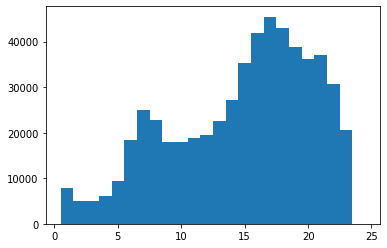

In [12]:
# Plot your hourly data to histogram. Hint: set bins equal to 24 and range equal to (0.5,24.5)
plt.hist(df.Hour, bins=24, range=(0.5,24.5))

## Analyze the weekday

In [14]:
# Plot your weekly data to histogram. Hint: set bins equal to 7 and range equal to (-0.5,6.5),color to green
plt.hist(df.weekday, bins=7, color='green', range(-0.5,6.5),rwidth=0.8)
# Set xticks by the name of week day
xticks(range(7)"Mon Tue Wed Thu Fri Sat Sun".split(" "))

SyntaxError: invalid syntax (<ipython-input-14-acda46e94efb>, line 4)

## Cross Analysis

In [0]:
# Group your rows by two column and unstack it and set as new dataframe. Note unstack function takes second column name and set as columns of dataframe
# Hint: remember count_rows function
df_by_cross = df.groupby(["Weekday","Hour"]).apply(count_rows).unstack()

In [0]:
# Create seaborn heatmap with new dataframe
sns.heatmap(df_by_cross)

## Analysis by Lon and Lat

In [ ]:
# Create a histogram with Lat, set bins to 100 because the default is 10
plt.hist(df["Lat"], bins=100)

In [ ]:
# Create a histogram with Lon, set bins to 100
plt.hist(df["Lon"], bins=100)